# Survival analysis of Antiretroviral therapy (ART) vs Ayurvedic therapy (AT) for HIV infection

# Variables
- "Time of event" = Time in days
- "Total no. of patients died in both groups" = Total number of patients that have died 
- "No of patients died - ART group" = Number of patients that died in the ART group
- "No of patients died - AT group" = Number of patients that died in the AT group
- "Live at start of day" = Number of patients alive at the start of the day

In [1]:
import pandas as pandaboi
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [2]:
DIRECTORY_PATH = '/Users/salinalien/Downloads'
FILE_NAME = "Antiretroviral therapy vs Ayurvedic therapy for HIV Infection.csv"

In [3]:
# Load data
df = pandaboi.read_csv(f'{DIRECTORY_PATH}/{FILE_NAME}', sep = ";")
df.head()

,Time of event,Total no. of patients died in both groups,No of patients died - ART group,No of patients died - AT group,Live at start of day
0,6,1,1,0,46
1,9,1,0,1,45
2,12,1,1,0,44
3,13,1,0,1,43
4,21,1,1,0,42


# Data preprocessing
1. Check for missing data
2. Check data type

In [4]:
# Check for missing data
df.isnull().sum() / df.shape[0] * 100

Time of event                                0.0
Total no. of patients died in both groups    0.0
No of patients died - ART group              0.0
No of patients died - AT group               0.0
Live at start of day                         0.0
dtype: float64

In [5]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Time of event                              27 non-null     int64
 1   Total no. of patients died in both groups  27 non-null     int64
 2   No of patients died - ART group            27 non-null     int64
 3   No of patients died - AT group             27 non-null     int64
 4   Live at start of day                       27 non-null     int64
dtypes: int64(5)
memory usage: 1.2 KB


# Kaplan Meieir function and curve

In [6]:
# Fit a KaplanMeier function
kmf = KaplanMeierFitter()
time_event = df['Time of event']
censoring = df['Total no. of patients died in both groups']
print(df)

    Time of event  Total no. of patients died in both groups  \
0               6                                          1   
1               9                                          1   
2              12                                          1   
3              13                                          1   
4              21                                          1   
5              27                                          2   
6              32                                          1   
7              38                                          1   
8              39                                          1   
9              43                                          2   
10             49                                          2   
11             89                                          1   
12             93                                          1   
13            105                                          1   
14            126                       

<Axes: xlabel='timeline'>

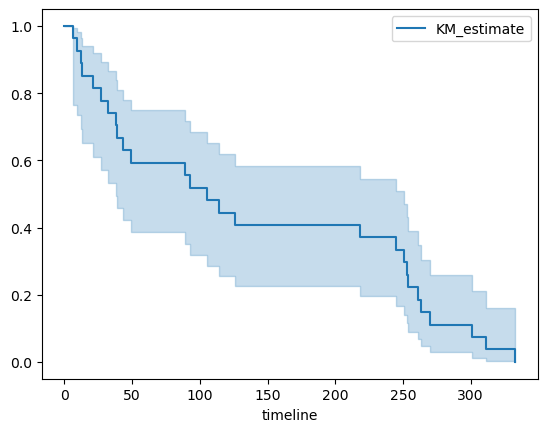

In [7]:
# Fit a KaplanMeier curve 
results = kmf.fit(time_event, censoring)
kmf.plot()

In [8]:
# Fit a KaplanMeier function

kmf_ART = KaplanMeierFitter()
kmf_AT = KaplanMeierFitter()

time_event = df['Time of event']
censoring_ART = df['No of patients died - ART group']
censoring_AT = df['No of patients died - AT group']

Text(0, 0.5, 'Cumulative survival')

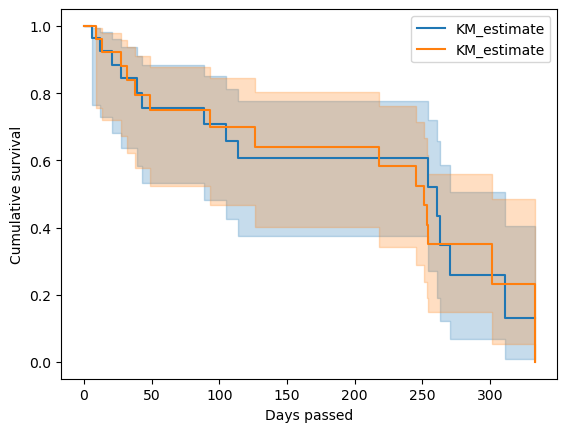

In [9]:
# Fit a KaplanMeier curve 
results_ART = kmf.fit(time_event, censoring_ART)
results_ART.plot()

# Fit a KaplanMeier curve 
results_AT = kmf.fit(time_event, censoring_AT)
results_AT.plot()

plt.xlabel("Days passed")
plt.ylabel("Cumulative survival")

# Log rank test

In [10]:
# Test for significant difference in cumulative survival between ART and AT
from lifelines.statistics import logrank_test
results=logrank_test(time_event, time_event, event_observed_A=censoring_ART, event_observed_B=censoring_AT)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.03 0.85      0.23

# Hazard ratio and cumulative hazard function curve

In [11]:
# Check hazard ratio
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(df['Time of event'], event_observed = df['Total no. of patients died in both groups'])

naf.cumulative_hazard_

,NA_estimate
timeline,
0.0,0.000000
6.0,0.037037
9.0,0.075499
12.0,0.115499
13.0,0.157165
21.0,0.200644
27.0,0.246098
32.0,0.293717
38.0,0.343717


<Axes: xlabel='timeline'>

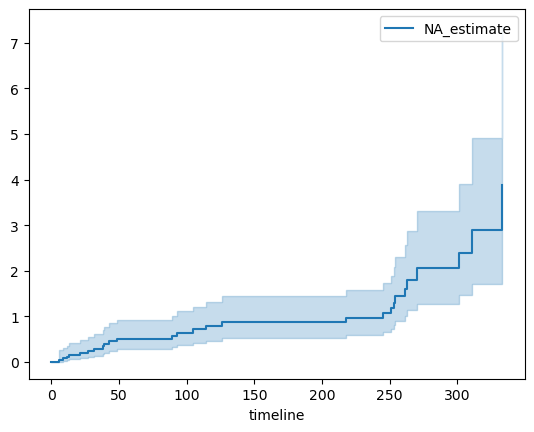

In [12]:
# Plot the cumulative_hazard
naf.plot_cumulative_hazard()